---
### 1) Marginal and conditional densities I (Discrete distributions)
You’re doing a development experiment in which on each attempt of your experiment, you get either 1, or, two, or three dividing cells (we’ll call the number of dividing cells $y$), and there are 1, or, two, or three genes of interest expressed (we’ll call this number $x$). The possible outcomes occur with the following joint probability:

| _ | x = 1 | x = 2 | x = 3 |
|------|------|------|------|
| y = 1 | 3/18 | 1/18 | 3/18 |
| y = 2 | 1/18 | 2/18 | 1/18 |
| y = 3 | 3/18 | 1/18 | 3/18 |

**2a)** From this joint two-dimensional density, compute

- $P(x)$ : the marginal distribution over x
- $P(y)$ : the marginal distribution over y
- $P(y\,|\,x=3)$ : the conditional over $y$ given $x=3$

**2b)** What is $p(x = 1|y = 1)$? What is $p(x = 1|y = 2)$? Are $x$ and $y$ independent? Recall that two random variables $X$ and $Y$ are independent if and only if $$ P(X,Y) = P(X)P(Y)$$



In [4]:
%autosave 1
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import factorial # calculates the factorial of arrays elementwise
import matplotlib.mlab as mlab
import scipy.stats as stats
import math

Autosaving every 1 seconds


---
### 2) Marginal and conditional densities II (Continuous distributions and numerical integration)

Load the file `pdfData2D.mat`, which contains a discretely sampled 2D probability density. The variables defined include: 

$\quad$ `x` = a vector of $x$ points

$\quad$ `y` = a vector of $y$ points

$\quad$ `Pxy` = a 2D matrix, whose $(i, j)$ 'th entry is the probability $p(x = {\tt x[j]}, y = {\tt y[i]})$ 

*Note:* This isn't really "continuous", is it? When we work with continuous densities, it is common to discretely sample them in a grid. While this problem looks harder than the previous problem, all of the same methods apply! The *only* difference is that instead of three values of $x$ and $y$, we now have 200 and 250 values, respectively.
 
*Another Note:* `np.sum(Pxy) * dx * dy = 1`, where `dx = x[2] - x[1] = .1 = dy`.  Here is a block of code to get you started and help you visualize $p(x,y)$: (use this as a reference when you'll need to make your own 2D plots below)

**4a)** From this joint two-dimensional density, compute and make plots (or images) of

- $P(x)$ : the marginal distribution over x

- $P(y)$ : the marginal distribution over y

- $P(y\,|\,x=5)$ : the conditional over $y$ given $x=5$

- $P(x\,|\,y)$ : the full image of the conditional density $P(x\,|\,y)$

Are the random variables $X$ and $Y$ independent?

**4b)**  Three common statistics one might wish to compute from a density are its mean, mode, and median.  

- The *mean* is the average value, given by $\mathbb{E}[x] = \int x P(x) dx$ when $P(x)$ is a pdf, and $\mathbb{E}[x] = \sum_{i} x_i P(x_i)$ when $P(x)$ is a pmf.

- The *mode* is the value $x$ where $P(x)$ takes its maximum. We
  can write this (fancily, if we like) as $\arg\max_x P(x)$. 

- The *median* is the value of $x$ where half the probability
  mass $P(x)$ is to the left (smaller than $t$) and half the
  probability is to the right (greater than $t$). In math notation,
  this corresponds to saying that the mode $t$ satisfies 
  
  Compute the mean, mode and median of the marginal $P(x)$ and of the conditional $P(x|y=3)$.  


<IPython.core.display.Javascript object>


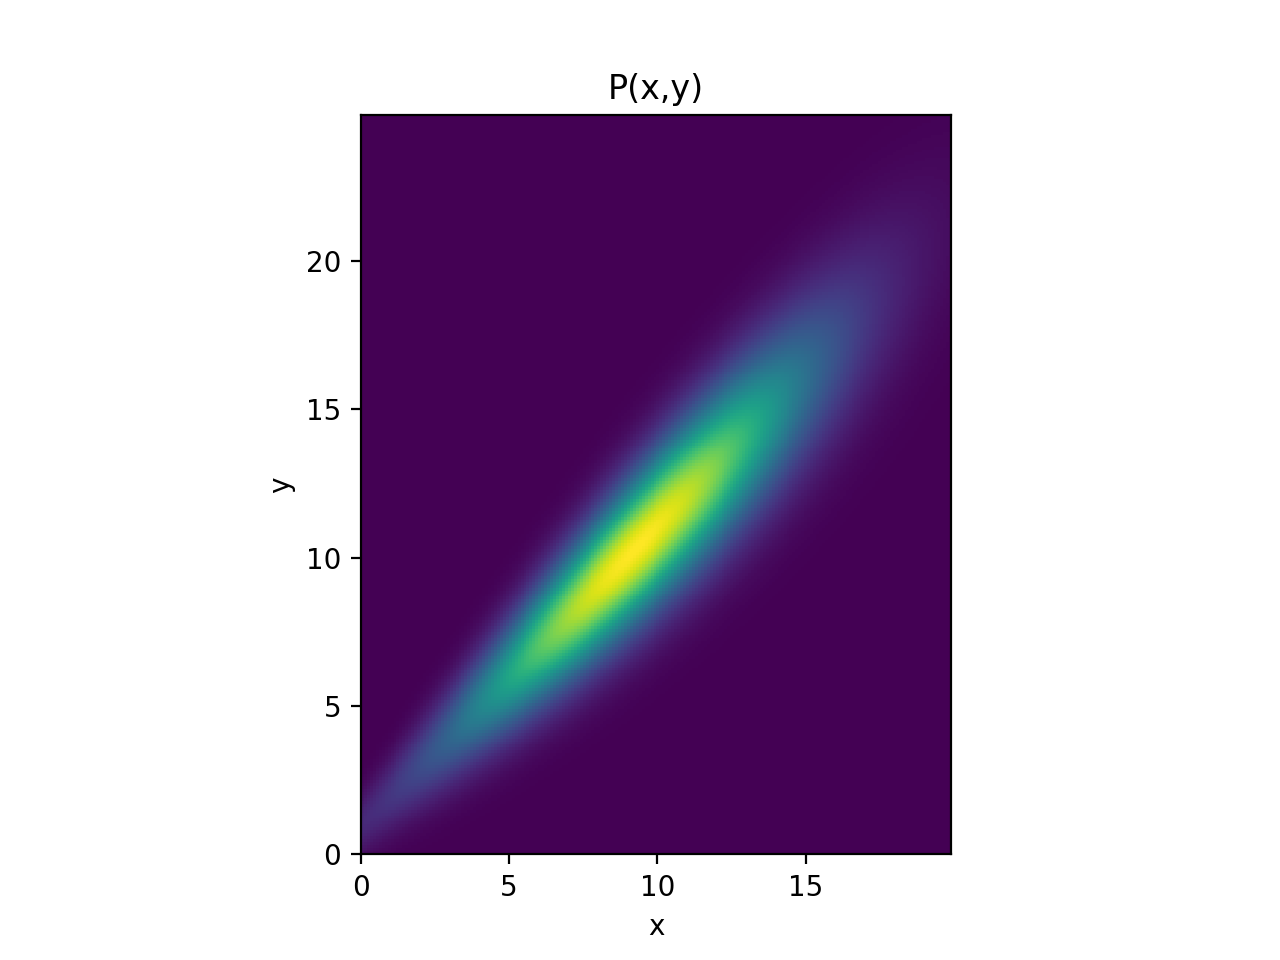

sum(Pxy)*dx*dy is equal to 0.9999999999999996


In [47]:
# Read in the variables from pdfData2D.mat
from scipy.io import loadmat
data = loadmat('pdfData2D.mat')
x = data['x']
y = data['y']
Pxy = data['Pxy']

# Plot using imshow and label axes
plt.figure()
plt.imshow(Pxy, origin='lower', interpolation='none', 
           extent=(x[0,0],x[-1,0],y[0,0],y[-1,0]), aspect='equal',
           cmap='viridis')
plt.title('P(x,y)')
plt.xlabel('x')
plt.ylabel('y')

# Verify: sum(Pxy(:))*dx*dy = 1, where dx = x(2)-x(1) = .1 = dy
dx = 0.1
dy = 0.1
sum_pxy = np.sum(np.sum(Pxy))
print('sum(Pxy)*dx*dy is equal to', sum_pxy*dx*dy)

---
### 3) Marginal and conditional densities III (Inference)

Reload the file `pdfData2D.mat`, which contains the same discretely sampled 2D probability density. The variables defined include: 

$\quad$ `x` = a vector of $x$ points

$\quad$ `y` = a vector of $y$ points

$\quad$ `Pxy` = a 2D matrix, whose $(i, j)$ 'th entry is the probability $p(x = {\tt x[j]}, y = {\tt y[i]})$  (you do not need to use this for this question!)

Let us now assert a model such that the mean value of $y$ is a linear function of $x$. More specifically, let us assert that the data, $y$, represent the mean of a Gaussian distribution is described by a linear function of $x$ (i.e. $\mu = m*x$, where $y = \N(\mu, \sigma^2)$. For this exercise, let us assume the variance of the distribution is fixed at a value of 1, $\sigma^2 = 1$. 

We call this the **likelihood function**. Here, we will find the *maximum likelihood estimate* (MLE) $m_{MLE}$ as a function of the noisy measurement $y$, and the input data, $x$, where $m_{MLE} = \arg\max_m P(y\,|\,x, m)$ is the mode of the likelihood function. We will do this in two steps:

 - First, write a function that computes the likelihood of the data with mean $mx$ and variance 1. Hint: try looking up and using the function - `stats.distributions.norm.logpdf()`
 
 - sweep through a value of ms, and select the m that has the largest likelihood.